In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=3d9539796ce232e0012e6f46f2c00fe168bed17caee53afdf12d8e39d296a6c8
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

print(spark.sparkContext)
print("Spark App Name: " + spark.sparkContext.appName)


<SparkContext master=local[*] appName=pyspark-shell>
Spark App Name: pyspark-shell


In [3]:
df = spark.read.csv("BostonHousing.csv",  header=True, inferSchema=True)
df.show(5)



+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



**Task 3 - Combine features to a single vector columns using VectorAssembler (all columns other than target column 'medv')**

In [4]:
# Combine features to a single vector columns using VectorAssembler (all columns other than target column 'medv')

from pyspark.ml.feature import VectorAssembler

feature_columns = df.drop("medv").columns


assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
df_vector = assembler.transform(df)

df_vector.show(5)


+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+
only showing top 5 rows



**Task 4 -  Standardize features for principal component analysis**

In [5]:
# Standardize features for principal component analysis

import pyspark.sql.functions as F
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scaler_model = scaler.fit(df_vector)
df_scaled = scaler_model.transform(df_vector)

df_scaled.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035610...|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|[0.06905,0.0,2.18...|[-0.4120740534

**Task 5 - Train model for two principal component analysis**

In [6]:
# Train model for two principal component analysis

from pyspark.ml.feature import PCA

pca = PCA(k=2, inputCol="scaledFeatures", outputCol="pcaFeatures")
pca_model = pca.fit(df_scaled)
df_pca = pca_model.transform(df_scaled)

df_pca.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|            features|      scaledFeatures|         pcaFeatures|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+--------------------+--------------------+--------------------+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|[0.00632,18.0,2.3...|[-0.4193669292132...|[2.09622303023858...|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|[0.02731,0.0,7.07...|[-0.4169266699640...|[1.45581098944742...|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|[0.02729,0.0,7.07...|[-0.4169289951277...|[2.07254655194818...|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|[0.03237,0.0,2.18...|[-0.4163384035

**Task 6 - Collect distributed data in numpy array and then convert to pandas dataframe**

In [20]:
# Collect distributed data in numpy array and then convert to pandas dataframe
import pandas as pd

result_for_pca = df_pca.select("pcaFeatures").collect()
pca_df = pd.DataFrame([list(row.pcaFeatures) for row in result_for_pca], columns=["PC_one", "PC_two"])

pca_df.head()


,PC_one,PC_two
0,2.096223,0.772348
1,1.455811,0.591400
2,2.072547,0.599047
3,2.608922,-0.006864
4,2.455755,0.097615


**Task 7- Plot two principal components**

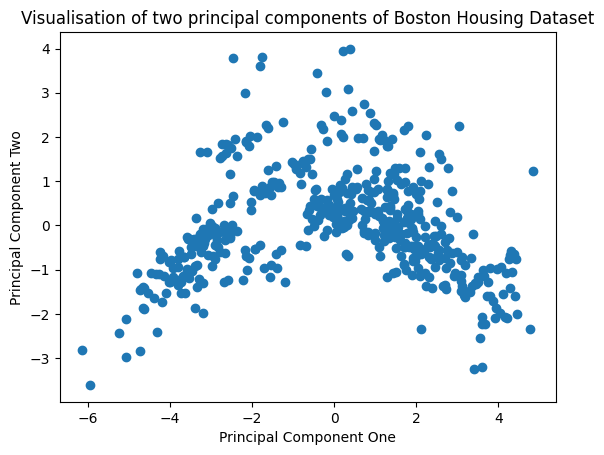

In [22]:
import matplotlib.pyplot as plt

plt.scatter(pca_df["PC_one"], pca_df["PC_two"])
plt.xlabel("Principal Component One")
plt.ylabel("Principal Component Two")
plt.title("Visualisation of two principal components of Boston Housing Dataset")
plt.show()


**Task 8 - Vectorize features and target together for model development**

In [23]:
from pyspark.ml.linalg import DenseVector
from pyspark.sql.functions import col

df_final = df_scaled.select(col("scaledFeatures").alias("features"), col("medv").alias("label"))

df_final.show(5)

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.4193669292132...| 24.0|
|[-0.4169266699640...| 21.6|
|[-0.4169289951277...| 34.7|
|[-0.4163384035610...| 33.4|
|[-0.4120740534296...| 36.2|
+--------------------+-----+
only showing top 5 rows



**Task 9 - Split dataset into training and testing dataset**

In [10]:
train_data, test_data = df_final.randomSplit([0.8, 0.2], seed=42)

train_data.show(5)
test_data.show(5)


+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.4193669292132...| 24.0|
|[-0.4190483817933...| 32.2|
|[-0.4185891619727...| 32.7|
|[-0.4185775361545...| 35.4|
|[-0.4185205696451...| 18.9|
+--------------------+-----+
only showing top 5 rows

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[-0.4188274912467...| 22.0|
|[-0.4184961554268...| 50.0|
|[-0.4184287256810...| 29.1|
|[-0.4180346104426...| 32.9|
|[-0.4175707402947...| 42.3|
+--------------------+-----+
only showing top 5 rows



**Task 10- Fit model for linear regression**

In [11]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="label")
lr_model = lr.fit(train_data)


**Task 11 - Find out model coefficients and intercept**

In [12]:

print(f"Coefficients: {lr_model.coefficients}")
print(f"Intercept: {lr_model.intercept}")


Coefficients: [-0.977325078745046,1.1406822132685321,0.16324504123061745,0.7116333928728624,-2.133936592267314,2.4703173958890168,0.1467029188600288,-2.982492178640501,2.888780728502063,-2.2934351604834595,-2.0640900942975704,0.7853802659203177,-3.709806672002421]
Intercept: 22.596434879491607


**Task 12 - Evaluate model for test dataset**

In [13]:
test_results = lr_model.evaluate(test_data)

print(f"RMSE: {test_results.rootMeanSquaredError}")
print(f"R^2: {test_results.r2}")

RMSE: 4.671806485171367
R^2: 0.7931522547835894


**Task 13 - Perform further analysis for better interpretation of model results.**

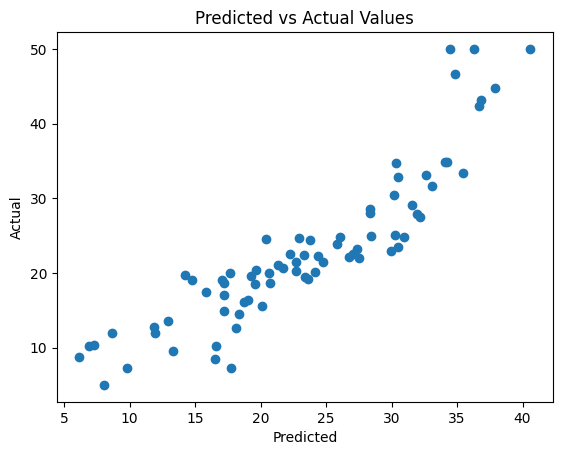

In [14]:
test_predictions = lr_model.transform(test_data).select("features", "label", "prediction")
test_predictions_pd = test_predictions.toPandas()

plt.scatter(test_predictions_pd["prediction"], test_predictions_pd["label"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Predicted vs Actual Values")
plt.show()

**Residual Analysis**

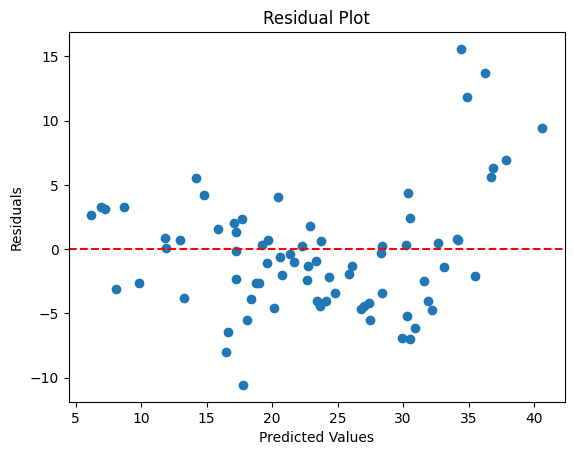

In [15]:
test_predictions_pd["residuals"] = test_predictions_pd["label"] - test_predictions_pd["prediction"]

plt.scatter(test_predictions_pd["prediction"], test_predictions_pd["residuals"])
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

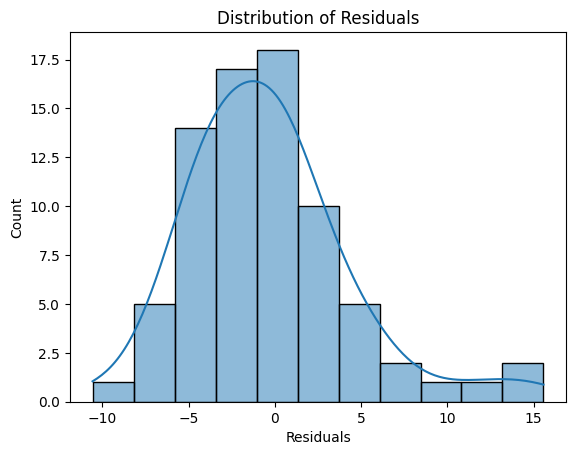

In [24]:
import seaborn as sns

# Distribution of residuals
sns.histplot(test_predictions_pd["residuals"], kde=True)
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

**Q-Q Plot**

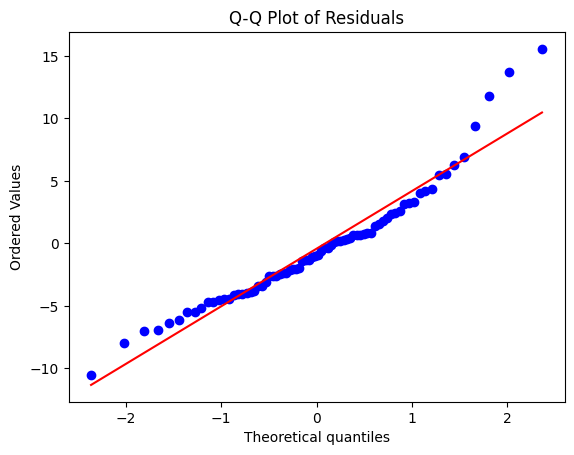

In [18]:
import scipy.stats as stats

stats.probplot(test_predictions_pd["residuals"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

**Feature Importance**

In [16]:
importance_df = pd.DataFrame({
    "Feature": feature_columns,
    "Coefficient": lr_model.coefficients.toArray()
})
importance_df.sort_values(by="Coefficient", ascending=False, inplace=True)

print(importance_df)

    Feature  Coefficient
8       rad     2.888781
5        rm     2.470317
1        zn     1.140682
11        b     0.785380
3      chas     0.711633
2     indus     0.163245
6       age     0.146703
0      crim    -0.977325
10  ptratio    -2.064090
4       nox    -2.133937
9       tax    -2.293435
7       dis    -2.982492
12    lstat    -3.709807
